# Task
Build a Naive Bayes classification model to predict customer churn using the `BankChurners.csv` dataset. Preprocess the data, train the model, evaluate its performance using accuracy, precision, recall, F1-score, and a classification report. Visualize the results using a confusion matrix and an ROC curve, then summarize the model's performance and key insights.

## Load Dataset

### Subtask:
Load the 'BankChurners.csv' dataset into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation, then load the specified 'BankChurners.csv' dataset into a DataFrame called `df`, and finally display the initial rows to provide a quick overview of its structure and content.



In [1]:
import pandas as pd

df = pd.read_csv('BankChurners.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  7

## Preprocess Data

### Subtask:
Preprocess the dataset by handling categorical variables (e.g., using one-hot encoding), splitting the data into features (X) and target (y), and then splitting it into training and testing sets.


**Reasoning**:
To begin preprocessing, I will drop the specified irrelevant or redundant columns, then convert the 'Attrition_Flag' column to numerical values, apply one-hot encoding to all other categorical features, and finally split the data into features (X), target (y), and then into training and testing sets for model preparation.



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Drop irrelevant or redundant columns
columns_to_drop = [
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
df_cleaned = df.drop(columns=columns_to_drop)

# 2. Convert 'Attrition_Flag' to numerical (0 for Existing Customer, 1 for Attrited Customer)
df_cleaned['Attrition_Flag'] = df_cleaned['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 3. Identify categorical columns and apply one-hot encoding
categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# 4. Separate features (X) and target (y)
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train (after preprocessing):\n", X_train.head())

Shape of X_train: (7088, 32)
Shape of X_test: (3039, 32)
Shape of y_train: (7088,)
Shape of y_test: (3039,)

First 5 rows of X_train (after preprocessing):
       Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
415             49                2              38                         3   
3749            61                0              51                         4   
9295            27                0              19                         1   
8290            52                1              36                         1   
7672            44                3              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
415                        2                      0        8077.0   
3749                       2                      2        8476.0   
9295                       1                      3       34516.0   
8290                       1                      3        3040.0   
7672       

## Train Naive Bayes Model

### Subtask:
Train a Naive Bayes classification model (e.g., Gaussian Naive Bayes or Multinomial Naive Bayes, depending on the data type after preprocessing) using the training data.


**Reasoning**:
To train the Naive Bayes model, I will first import the necessary `GaussianNB` classifier, instantiate it, and then fit the model to the training data (`X_train`, `y_train`) to learn the patterns.



In [3]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model using the training data
naive_bayes_model.fit(X_train, y_train)

print("Naive Bayes model trained successfully.")

Naive Bayes model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set. Calculate and display key metrics such as accuracy, precision, recall, F1-score, and a classification report.


**Reasoning**:
To evaluate the model's performance, I will import the necessary metrics, make predictions on the test set, and then calculate and print the accuracy, precision, recall, F1-score, and a comprehensive classification report.



In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(report)

Model Evaluation Metrics:
Accuracy: 0.8852
Precision: 0.6721
Recall: 0.5786
F1-Score: 0.6219

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2543
           1       0.67      0.58      0.62       496

    accuracy                           0.89      3039
   macro avg       0.80      0.76      0.78      3039
weighted avg       0.88      0.89      0.88      3039



## Visualize Model Performance

### Subtask:
Visualize the model's performance using a confusion matrix and an ROC curve.

**Reasoning**:
To visualize the model's performance, I will first import the necessary libraries for plotting, then calculate the confusion matrix and plot it using a heatmap, and finally compute the ROC curve and AUC score to visualize it.



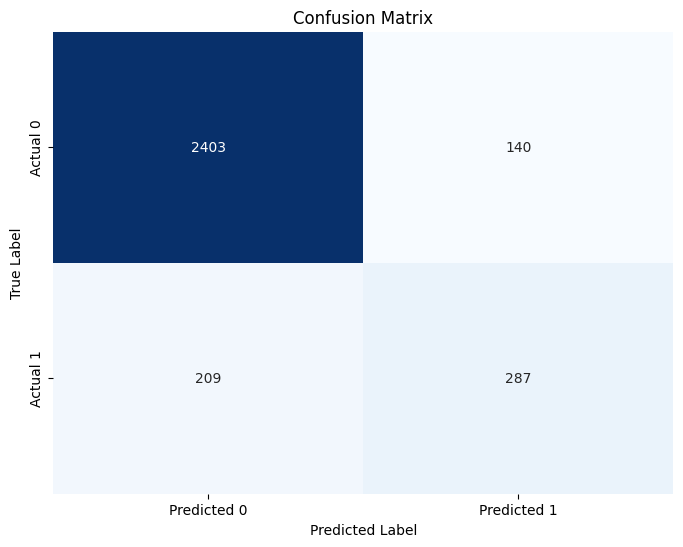

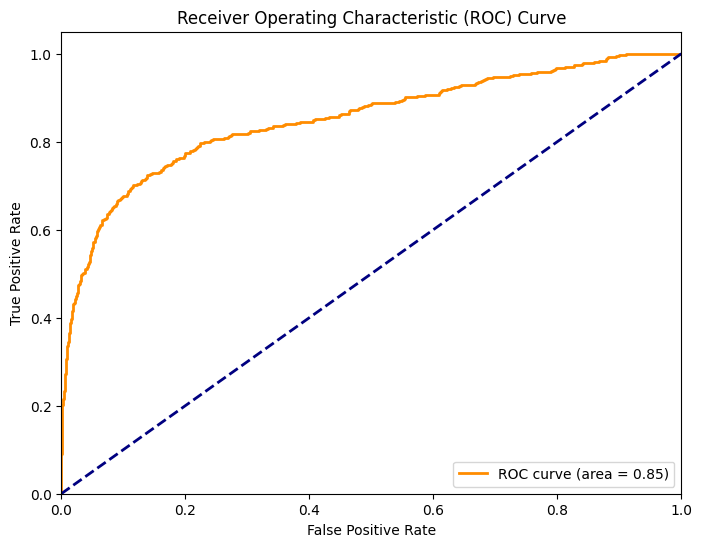

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. ROC Curve and AUC
y_pred_proba = naive_bayes_model.predict_proba(X_test)[:, 1] # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Summarize Model Performance and Key Insights

### Subtask:
Summarize the model's performance based on the evaluation metrics and visualizations, providing key insights into its strengths and weaknesses regarding customer churn prediction.

### Summary of Model Performance and Key Insights

The Naive Bayes model achieved an **Accuracy of 0.8852**, indicating it correctly classified about 88.5% of customers. However, accuracy alone can be misleading in imbalanced datasets like churn prediction, where the majority class (non-churn) is much larger.

Looking at the churn class (Attrited Customer = 1):
-   **Precision: 0.6721** means that when the model predicts a customer will churn, it is correct about 67.2% of the time. This is important for minimizing false positives (predicting churn when it doesn't happen).
-   **Recall: 0.5786** means the model correctly identified 57.9% of all actual churners. This metric indicates the model's ability to catch churners.
-   **F1-Score: 0.6219** is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on the churn class.

From the **Confusion Matrix**:
-   **True Negatives (Actual 0, Predicted 0): 2403**. The model correctly identified a large number of existing customers.
-   **False Positives (Actual 0, Predicted 1): 140**. The model incorrectly predicted 140 existing customers as churners.
-   **False Negatives (Actual 1, Predicted 0): 209**. The model failed to identify 209 actual churners, classifying them as existing customers.
-   **True Positives (Actual 1, Predicted 1): 287**. The model correctly identified 287 actual churners.

The **ROC Curve and AUC (0.85)** suggest that the model has a reasonably good ability to distinguish between churners and non-churners. An AUC of 0.85 indicates that there is a 85% chance that the model will distinguish between a randomly chosen positive instance and a randomly chosen negative instance.

**Key Insights:**

*   **Strength:** The model performs well in identifying existing customers (high true negatives) and has a decent overall accuracy. The AUC score indicates good discriminatory power.
*   **Weakness:** The recall for churners is moderate (57.9%), meaning a significant portion of actual churners are missed (false negatives). Depending on the business cost of missing a churner versus incorrectly predicting one, this might be an area for improvement. The precision for churners (67.2%) is acceptable but also shows room for improvement.
*   **Imbalance Handling:** The model shows reasonable performance despite the likely class imbalance (fewer churners than existing customers), but the lower recall for the minority class is typical and often targeted for improvement in such scenarios.

Overall, the Naive Bayes model provides a good baseline for churn prediction, but further optimization or exploration of other models might be beneficial to improve the detection rate of churners, especially if the cost of false negatives is high for the business.

## Final Task

### Subtask:
Summarize the model's performance, discussing the key metrics and insights gained from the visualizations.


## Summary:

### Q&A
The model's performance can be summarized as follows:

The Naive Bayes classification model achieved an overall accuracy of 0.8852, meaning it correctly classified approximately 88.5% of customers. For the churn class (Attrited Customer = 1), the model showed a precision of 0.6721, indicating that when it predicts churn, it is correct 67.2% of the time. The recall for the churn class was 0.5786, meaning the model successfully identified about 57.9% of all actual churners. The F1-score for the churn class was 0.6219, providing a balanced measure of precision and recall.

From the confusion matrix, the model correctly identified 2403 existing customers (True Negatives) and 287 actual churners (True Positives). However, it incorrectly predicted 140 existing customers as churners (False Positives) and notably missed 209 actual churners, classifying them as existing customers (False Negatives). The Receiver Operating Characteristic (ROC) curve analysis yielded an Area Under the Curve (AUC) of 0.85, suggesting a good ability to distinguish between churners and non-churners.

### Data Analysis Key Findings
*   The initial dataset, `BankChurners.csv`, was loaded successfully.
*   Three irrelevant columns were dropped, and the target variable `Attrition_Flag` was converted to a numerical format (0 for 'Existing Customer', 1 for 'Attrited Customer').
*   Categorical features were one-hot encoded, and the data was split into training and testing sets, resulting in `X_train` with 7088 samples and 32 features, and `X_test` with 3039 samples and 32 features.
*   A Gaussian Naive Bayes model was trained for customer churn prediction.
*   Model evaluation on the test set yielded an accuracy of 0.8852.
*   For the churn class (Attrited Customer), the model achieved a precision of 0.6721, a recall of 0.5786, and an F1-score of 0.6219.
*   The confusion matrix revealed 2403 True Negatives, 140 False Positives, 209 False Negatives, and 287 True Positives.
*   The ROC AUC score was calculated as 0.85, indicating a good discriminatory power of the model.

### Insights or Next Steps
*   While the model shows good overall accuracy and decent discriminatory power (AUC of 0.85), its moderate recall of 0.5786 for actual churners indicates a significant number of at-risk customers are being missed. This could lead to lost opportunities for retention interventions.
*   To improve the model's ability to identify churners, consider exploring more advanced classification algorithms, applying techniques for imbalanced datasets (e.g., SMOTE, adjusting class weights), or conducting more extensive feature engineering to capture more predictive signals related to churn.
